In [24]:
import pandas as pd
df = pd.read_csv('stock_prices_latest.csv')

In [25]:
df = df.set_index('date').sort_index().loc['2000-01-01': '2020-01-01']
df

,symbol,open,high,low,close,close_adjusted,volume,split_coefficient
date,,,,,,,,
2000-01-03,TRMK,21.620,21.620,21.250,21.310,11.5565,43500,1.0
2000-01-03,RNST,28.500,28.620,28.500,28.500,7.2112,844,1.0
2000-01-03,DGII,10.810,12.000,10.690,11.880,11.8800,199800,1.0
2000-01-03,OMN,7.625,7.625,7.313,7.438,7.0878,124200,1.0
2000-01-03,MAG,7.688,7.688,7.438,7.438,74.3800,84000,1.0
...,...,...,...,...,...,...,...,...
2019-12-31,SAUC,1.045,1.050,1.040,1.040,1.0400,43620,1.0
2019-12-31,JAZZ,148.090,149.800,147.510,149.280,149.2800,253631,1.0
2019-12-31,BYSI,15.580,15.630,15.200,15.500,15.5000,48702,1.0


In [26]:
df = df.drop(columns=['open', 'high', 'low', 'split_coefficient'])

In [27]:
df['dollar_volume'] = df['close'] * df['volume']


In [29]:
df['dollar_volume_avg'] = df.groupby('symbol')['dollar_volume'].transform(lambda x: x.mean())

In [ ]:
df
df.set_index('symbol', drop=False)


,symbol,close,close_adjusted,volume,dollar_volume,dollar_volume_avg
symbol,,,,,,
TRMK,TRMK,21.310,11.5565,43500,926985.00,6.888894e+06
RNST,RNST,28.500,7.2112,844,24054.00,2.325003e+06
DGII,DGII,11.880,11.8800,199800,2373624.00,1.211459e+06
OMN,OMN,7.438,7.0878,124200,923799.60,1.227120e+06
MAG,MAG,7.438,74.3800,84000,624792.00,1.113686e+06
...,...,...,...,...,...,...
SAUC,SAUC,1.040,1.0400,43620,45364.80,1.394049e+05
JAZZ,JAZZ,149.280,149.2800,253631,37862035.68,5.686830e+07
BYSI,BYSI,15.500,15.5000,48702,754881.00,3.899128e+05


In [64]:
import numpy as np

In [76]:
df1 = df.groupby('symbol')['dollar_volume_avg'].mean().nlargest(1500)
d = df['symbol'].unique()
d2 = np.setdiff1d(d, df1.keys())
# df.nlargest(2000, ['dollar_volume_avg'])
df2 = df.reset_index(drop=False).set_index('symbol').drop(index=d2, columns=['dollar_volume_avg', 'dollar_volume'])
df2

,date,close,close_adjusted,volume
symbol,,,,
TSN,2000-01-03,16.06,13.0819,235200
UL,2000-01-03,30.06,8.8566,490800
HP,2000-01-03,20.62,3.8783,572500
XL,2000-01-03,51.38,31.8483,451500
ABC,2000-01-03,15.56,3.2527,696200
...,...,...,...,...
VIPS,2019-12-31,14.17,14.1700,3749187
SQ,2019-12-31,62.56,62.5600,5339489
PBYI,2019-12-31,8.75,8.7500,1271190


In [77]:
df2 = df2.reset_index(drop=False).set_index('date')

In [124]:
df2 = df2.drop(columns=['return', 'dollar_vol'])

In [125]:
df2

,symbol,close,close_adjusted,volume
date,,,,
2000-01-03,TSN,16.06,13.0819,235200
2000-01-03,UL,30.06,8.8566,490800
2000-01-03,HP,20.62,3.8783,572500
2000-01-03,XL,51.38,31.8483,451500
2000-01-03,ABC,15.56,3.2527,696200
...,...,...,...,...
2019-12-31,VIPS,14.17,14.1700,3749187
2019-12-31,SQ,62.56,62.5600,5339489
2019-12-31,PBYI,8.75,8.7500,1271190


<Axes: title={'center': 'Stocks in Universe'}, xlabel='date'>

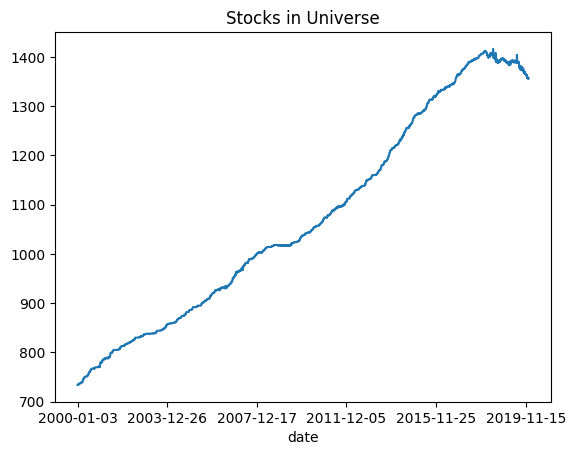

In [126]:
# Number of stocks per day
df2.groupby('date')['symbol'].nunique().plot(title='Stocks in Universe')